In [38]:
# Import our favorite libraries and modules
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import iirnotch, lfilter, freqz
import numpy as np
import pandas as pd
from scipy import signal
from scipy.signal import spectrogram
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [12]:

# specify the directory you want to use
directory = (r"C:\dina\Computational neuroscience course\proj.9\EEG DATA")

# get a list of all .mat files in the directory
mat_files = [f for f in os.listdir(directory) if f.endswith('.mat')]

# initialize an empty list to hold the dataframes
dataframes = []

# loop through the .mat files and load each one
for mat_file in mat_files:
    mat_data = loadmat(os.path.join(directory, mat_file))
    for key in mat_data:
        if isinstance(mat_data[key], np.ndarray):
            df = pd.DataFrame(mat_data[key])
            dataframes.append(df.iloc[:, :21000])

# concatenate all the dataframes
#concatenated = pd.concat(dataframes, axis=1)
concatenated_df = np.dstack(dataframes)
for i in range(6):
    print(dataframes[i].shape)
np.shape(concatenated_df)

(19, 21000)
(19, 21000)
(19, 21000)
(19, 21000)
(19, 21000)
(19, 21000)


(19, 21000, 6)

## Preprocessing:

In [13]:
#dataset info:(steady state closed-eye data )
fs = 250
n_channels = 19
total_time = 15*60 # secs per subject

sample_num = 21000 # it should have been 250* 15*60 = 225000 but the forth subject has less samples
samp_range = np.arange(0, sample_num)

In [14]:
# V is the voltage data
V = concatenated_df.astype('float32')

# high-pass filter above 50 Hz
# b, a = signal.butter(3, [50], btype='high', fs=250)
# V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
#V = np.abs(V)**2
# b, a = signal.butter(3, [1], btype='low', fs=250)
# V = signal.filtfilt(b, a, V, 0)



# The frequency to be removed from signal (i.e., 60Hz)
f0 = 60.0

# Quality factor
Q = 30.0

b, a = iirnotch(f0, Q, fs)
V = signal.filtfilt(b, a, V, 0)



# normalize each channel so its mean power is 1
#V = V/V.mean(0)

## Data visualization:

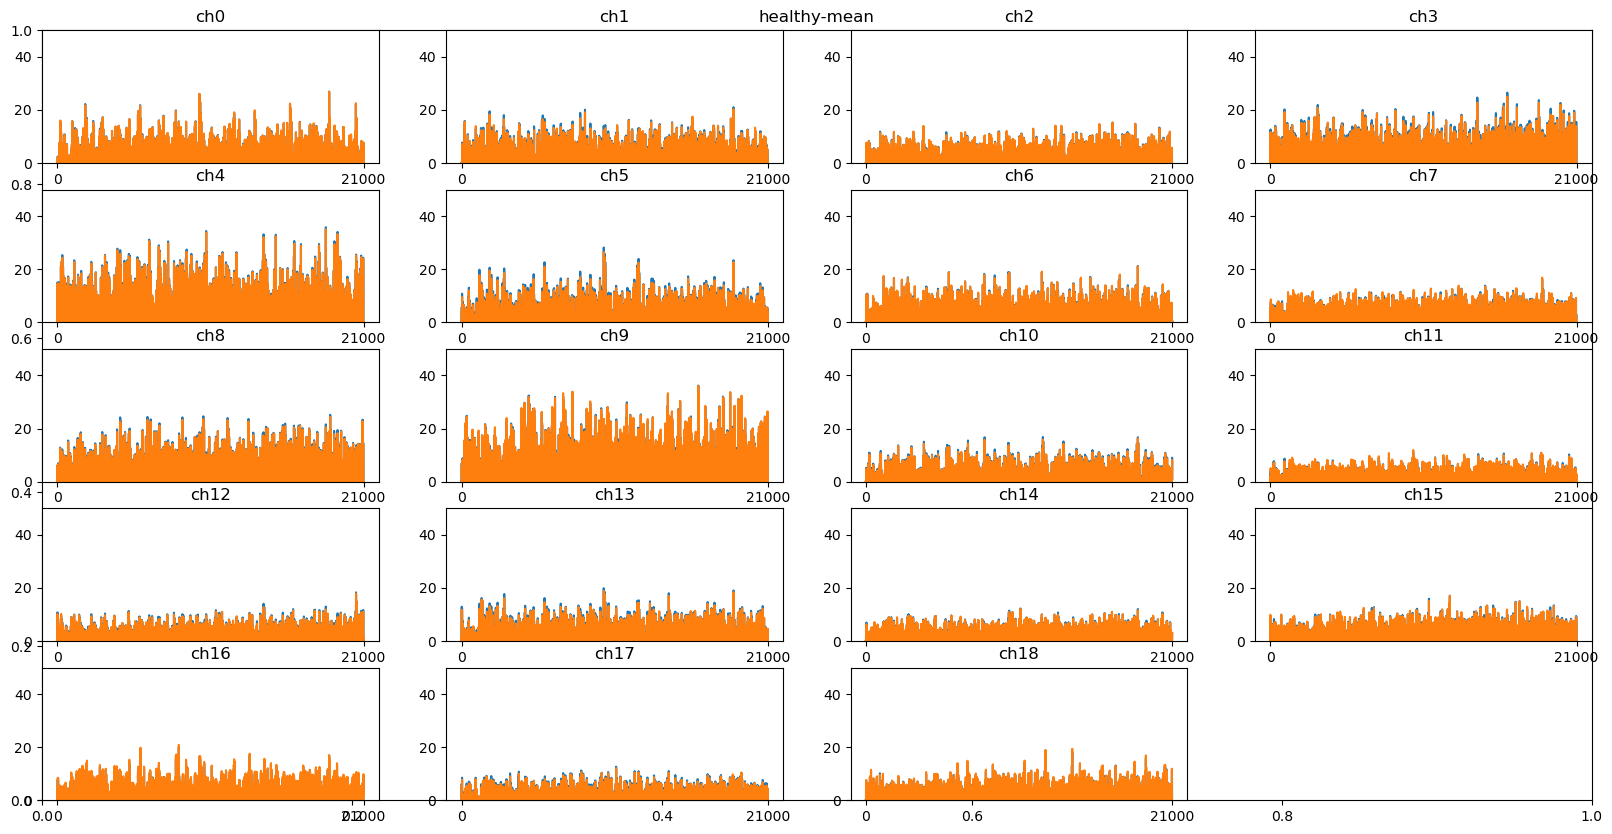

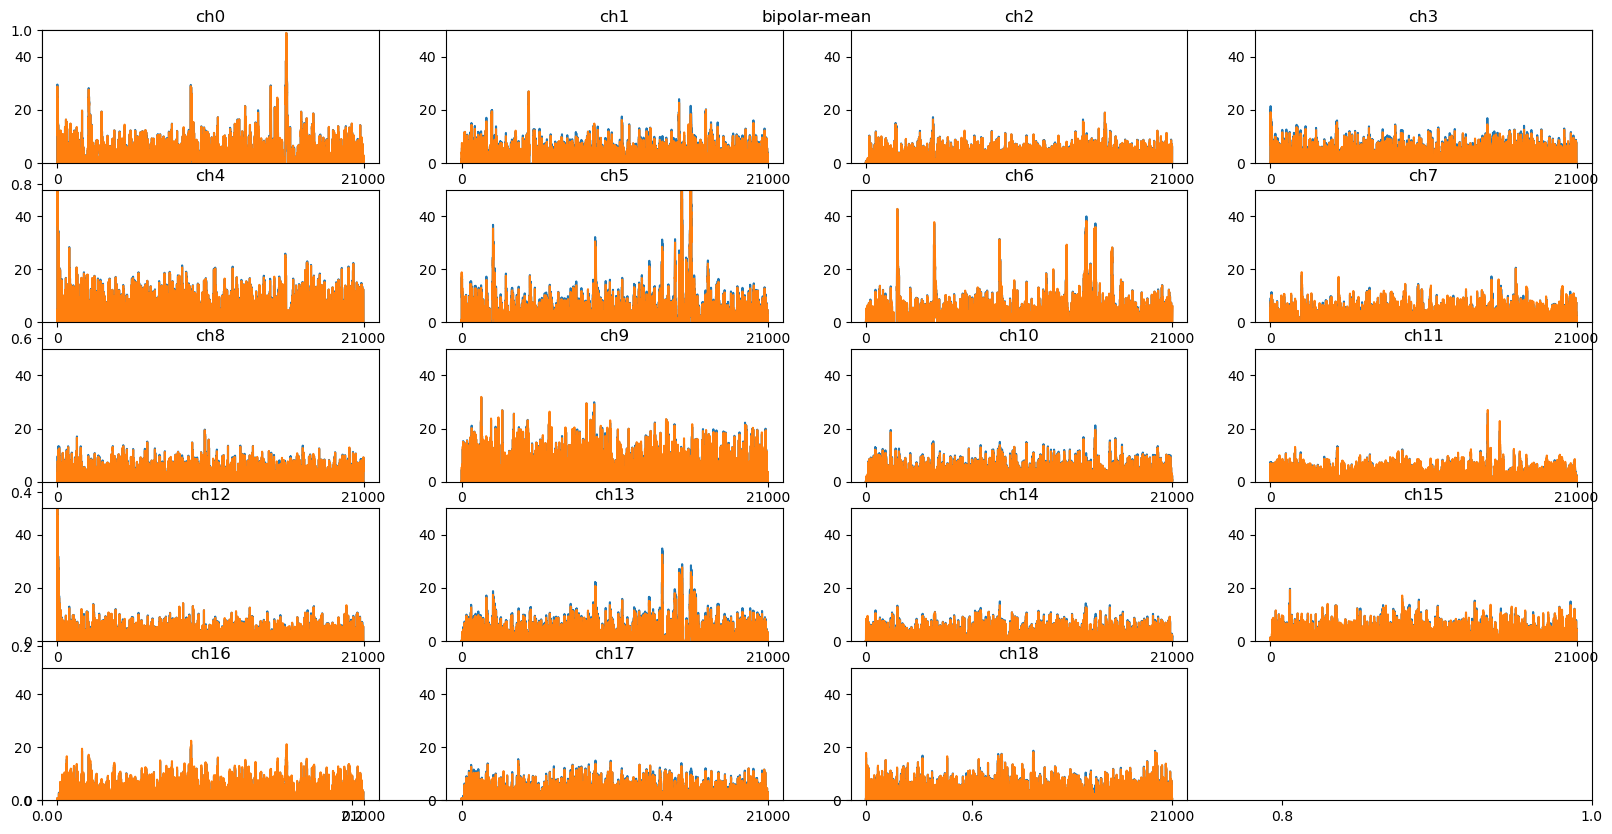

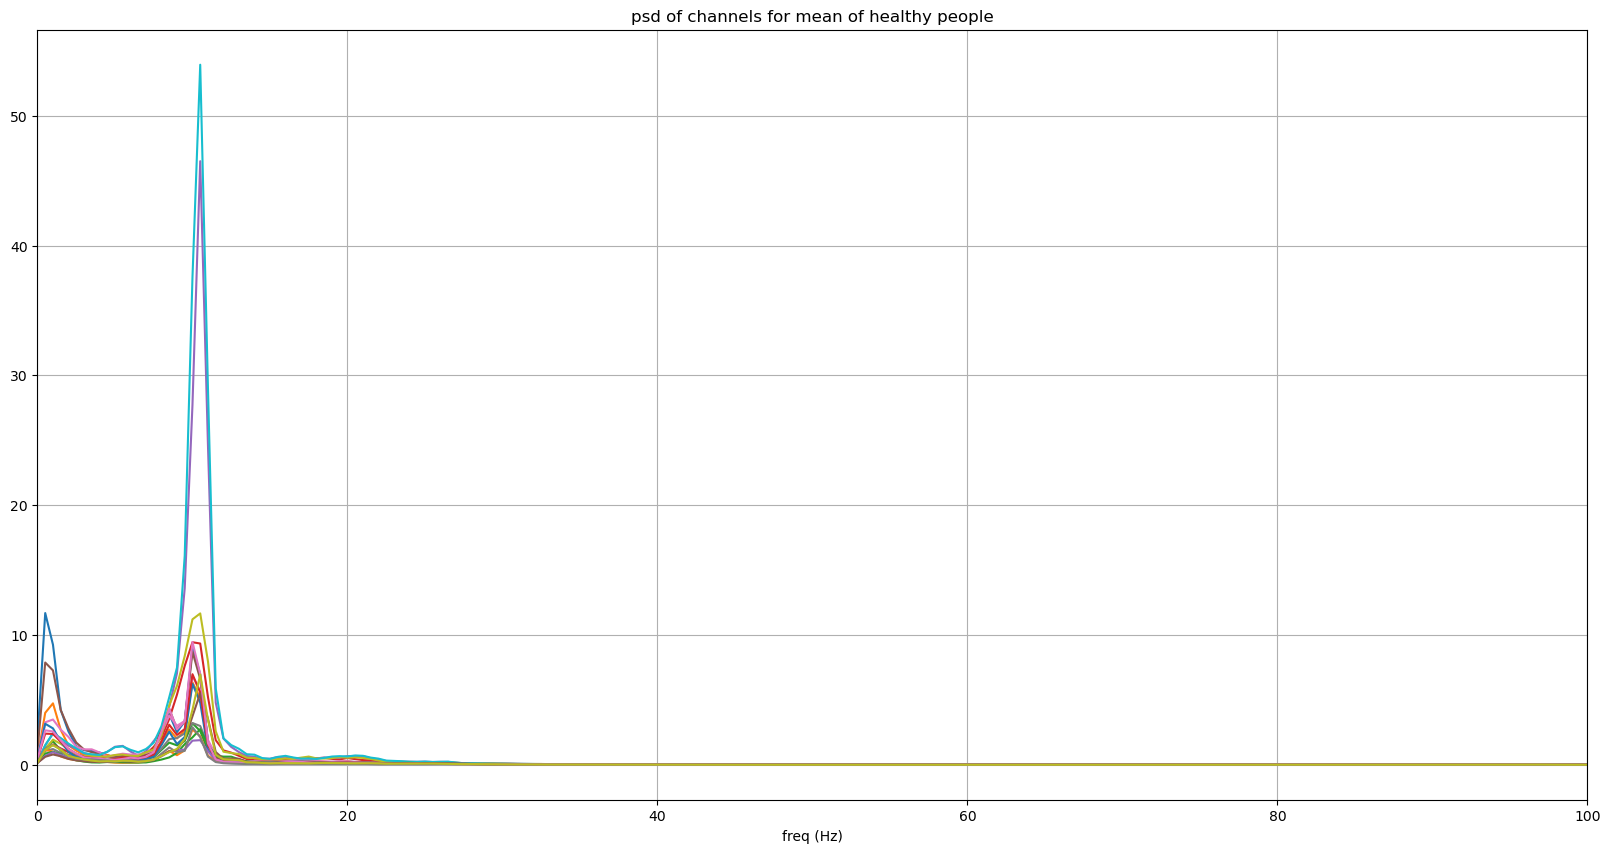

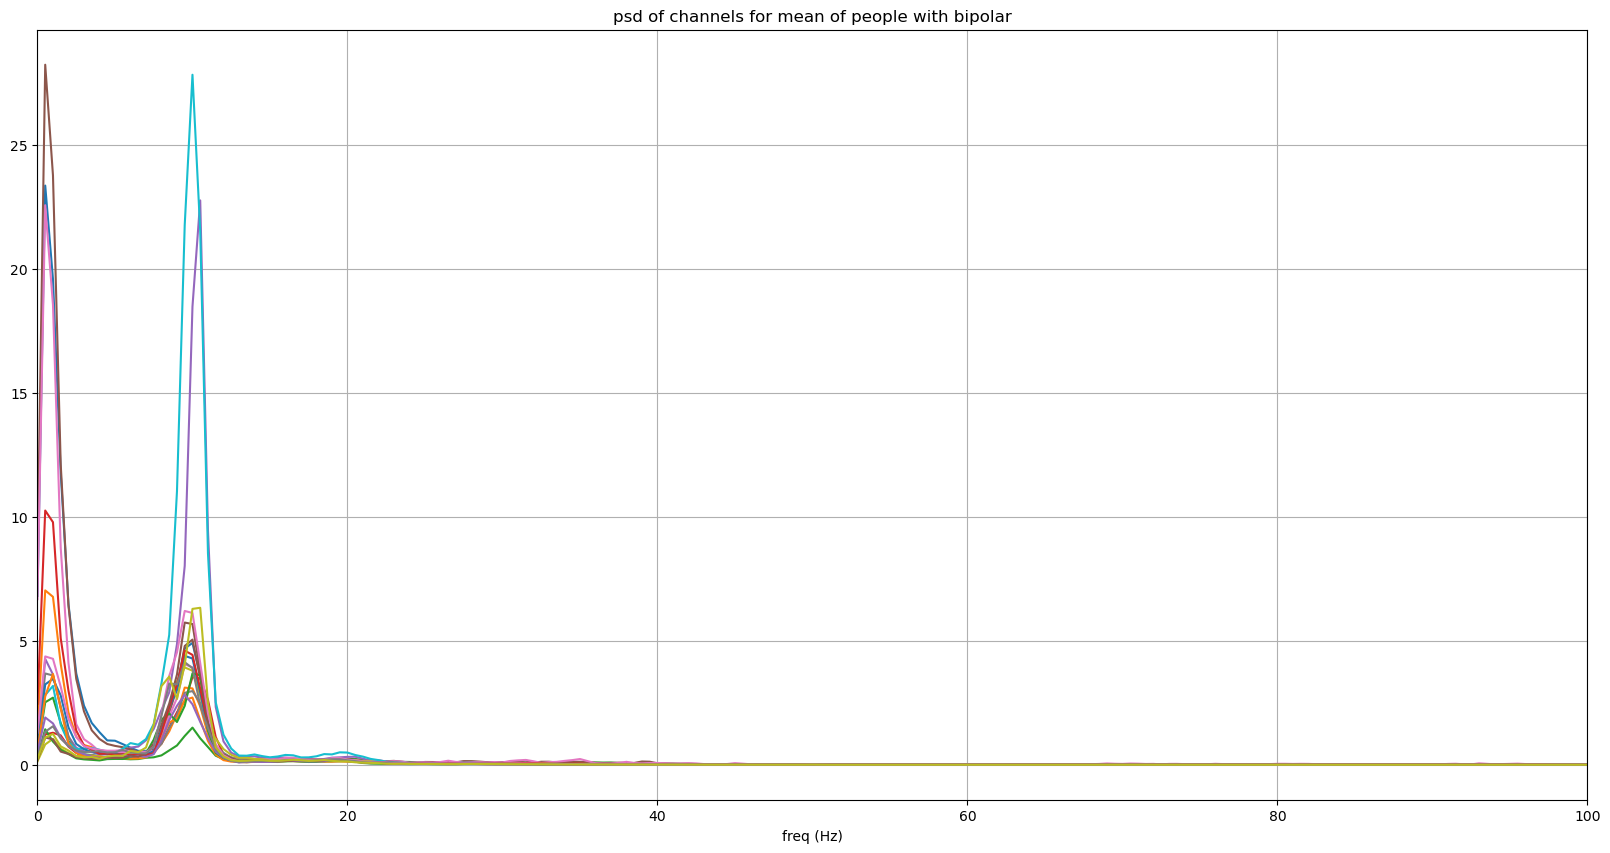

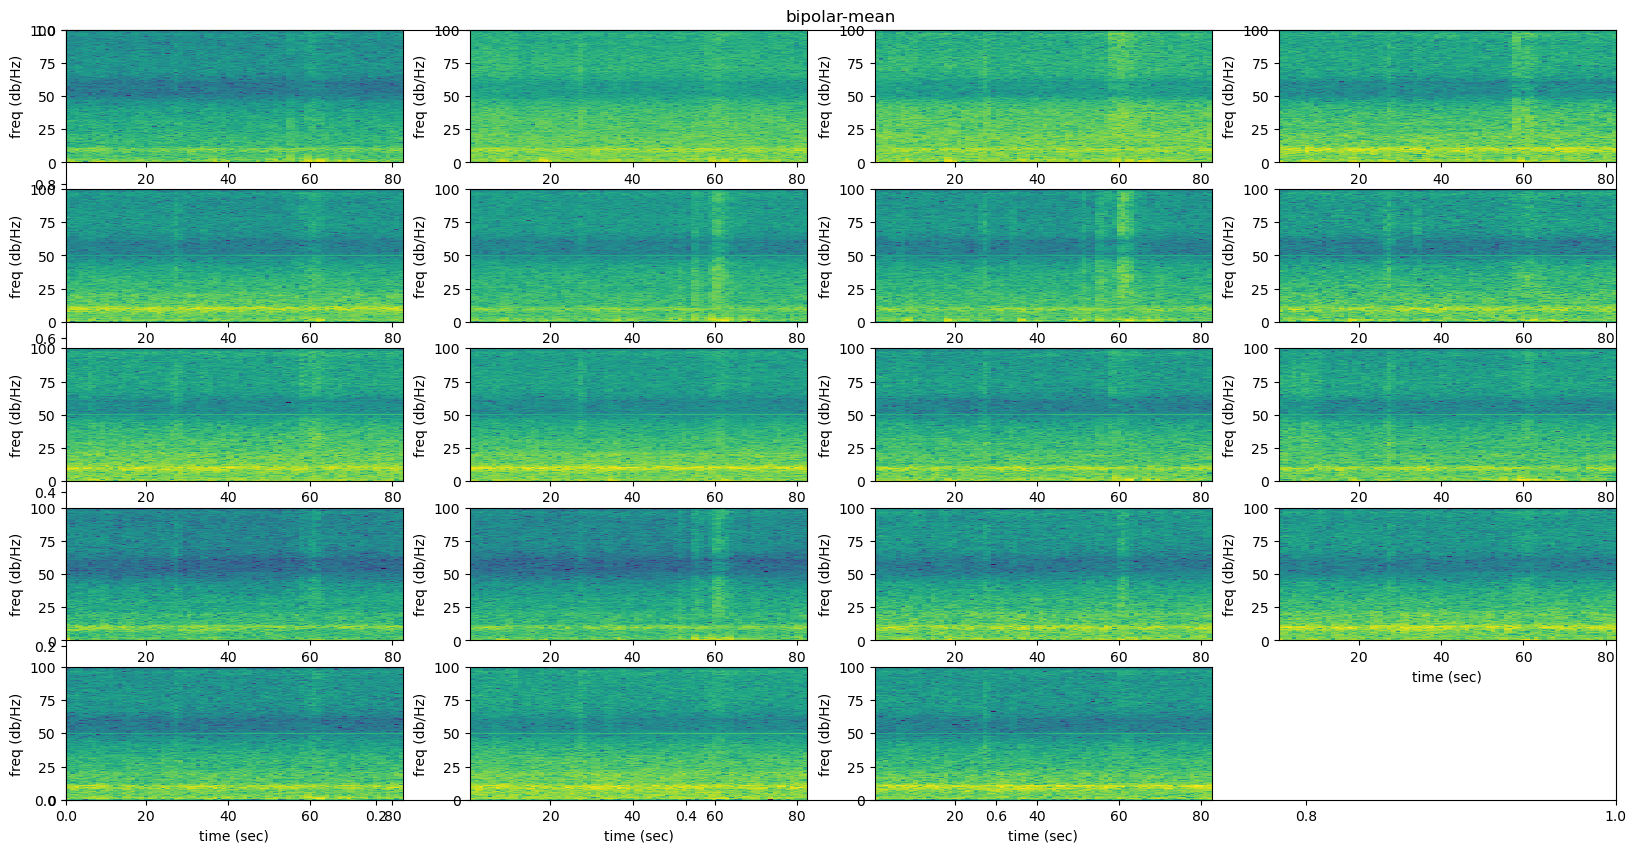

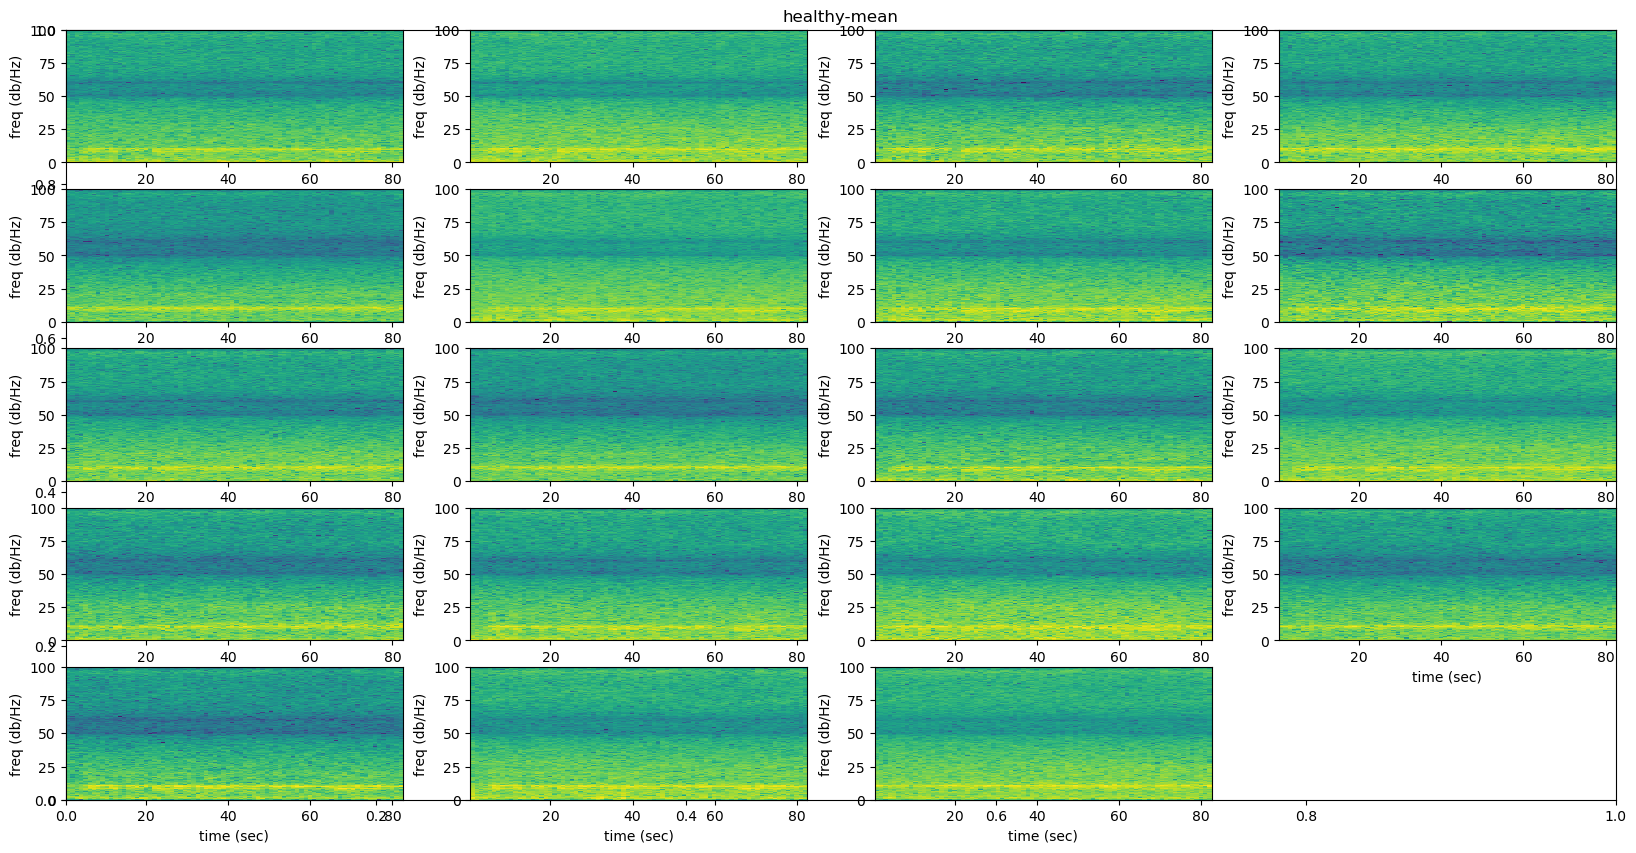

In [15]:
#data visualizing for first subject as an example

# sample-voltage for mean of healty people
plt.figure(figsize=(20, 10))
plt.title('healthy-mean')
for j in range(19):
  
  ax = plt.subplot(5, 4, j+1)
  plt.plot(samp_range, (concatenated_df[j,:,0:3].mean(1))) # raw data
  plt.plot(samp_range, (V[j,:,0:3].mean(1))) # preprocessed data
  plt.title('ch%d'%j)
  plt.xticks([0, 21000])
  plt.ylim([0, 50])
plt.show()


# sample-voltage for mean of healty people
plt.figure(figsize=(20, 10))
plt.title('bipolar-mean')
for j in range(19):
  
  ax = plt.subplot(5, 4, j+1)
  plt.plot(samp_range, (concatenated_df[j,:,3:6].mean(1))) # raw data
  plt.plot(samp_range, (V[j,:,3:6].mean(1))) # preprocessed data
  plt.title('ch%d'%j)
  plt.xticks([0, 21000])
  plt.ylim([0, 50])
plt.show()


# PSD for mean of healty people
plt.figure(figsize=(20, 10))
for j in range(19):
  #ax = plt.subplot(5, 4, j+1)
  #frs, power_spectrum = signal.welch((concatenated_df[j,:,0:2].mean(1)), fs, nperseg=fs)
  frs2, power_spectrum2 = signal.welch((V[j,:,0:3].mean(1)), fs, nperseg=2*fs)
  #plt.plot(frs, 10*np.log10(power_spectrum))
  plt.plot(frs2, power_spectrum2)
  plt.title('psd of channels for mean of healthy people')
  plt.xlim([0,100])
  plt.grid(True)
  plt.xlabel('freq (Hz)')
  #plt.show()

# PSD for mean of people with Bipolar
plt.figure(figsize=(20, 10))
for j in range(19):
  #ax = plt.subplot(5, 4, j+1)
  #frs, power_spectrum = signal.welch((concatenated_df[j,:,0:2].mean(1)), fs, nperseg=fs)
  frs2, power_spectrum2 = signal.welch((V[j,:,3:6].mean(1)), fs, nperseg=2*fs)
  #plt.plot(frs, 10*np.log10(power_spectrum))
  plt.plot(frs2, power_spectrum2)
  plt.title('psd of channels for mean of people with bipolar')
  plt.xlim([0,100])
  plt.grid(True)
  plt.xlabel('freq (Hz)')
  #plt.show()


# Spectogram for mean of people with Bipolar
plt.figure(figsize=(20, 10))
plt.title('bipolar-mean')
for j in range(19):
  ax = plt.subplot(5, 4, j+1)
  #freqs , times, Sxx = spectrogram((np.array(dataframes[0].iloc[j , :])), fs= fs, nperseg=fs, noverlap= 0.95 * 250)
  freqs2 , times2, Sxx2 = spectrogram((V[j,:,3:6].mean(1)), fs= fs, nperseg=2*fs, noverlap= 0.95 * 250)
  #plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
  plt.pcolormesh(times2, freqs2, 10*np.log10(Sxx2))
  plt.xlabel('time (sec)')
  plt.ylabel('freq (db/Hz)')
  plt.ylim([0,100])
plt.show()

# Spectogram for mean of people with Bipolar
plt.figure(figsize=(20, 10))
plt.title('healthy-mean')
for j in range(19):
  ax = plt.subplot(5, 4, j+1)
  #freqs , times, Sxx = spectrogram((np.array(dataframes[0].iloc[j , :])), fs= fs, nperseg=fs, noverlap= 0.95 * 250)
  freqs2 , times2, Sxx2 = spectrogram((V[j,:,0:3].mean(1)), fs= fs, nperseg=2*fs, noverlap= 0.95 * 250)
  #plt.pcolormesh(times, freqs, 10*np.log10(Sxx))
  plt.pcolormesh(times2, freqs2, 10*np.log10(Sxx2))
  plt.xlabel('time (sec)')
  plt.ylabel('freq (db/Hz)')
  plt.ylim([0,100])
plt.show()


## Feature extraction

In [16]:
t_seg = 2
n_per_seg = fs* t_seg
n_seg = 21000/ n_per_seg
print(n_per_seg)
print(n_seg)

500
42.0


In [17]:
import numpy as np
from scipy.signal import welch
from scipy.fftpack import fft


# Define frequency bands
alpha = (8, 12)
beta = (12, 30)
theta = (4, 8)
delta = (1, 4)

# Function to calculate power in specific frequency band
def bandpower(data, sf, band):
    freqs, psd = welch(data, sf)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.sum(psd[idx_band]) * freq_res

# Initialize arrays to store results
mean_values = np.zeros((6,42,19))
std_values = np.zeros((6,42,19))
total_power = np.zeros((6,42,19))
relative_power_alpha = np.zeros((6,42,19))
relative_power_beta = np.zeros((6,42,19))
relative_power_theta = np.zeros((6,42,19))
relative_power_delta = np.zeros((6,42,19))
fourier_coefficients = np.zeros((6,42,19))

# Loop over subjects and electrodes
for i in range(6):
    for j in range(19):
        for k in range(42):
            # Extract data for current subject and electrode
            data = V[j, k*n_per_seg:(k+1)*n_per_seg, i]
            
            # Calculate mean and standard deviation
            mean_values[i,k,j] = np.mean(data)
            std_values[i,k,j] = np.std(data)
            
            # Calculate total power
            total_power[i,k,j] = bandpower(data, 250, (0, 125))
            
            # Calculate relative power for each band
            relative_power_alpha[i,k,j] = bandpower(data, 250, alpha) / total_power[i,k,j]
            relative_power_beta[i,k,j] = bandpower(data, 250, beta) / total_power[i,k,j]
            relative_power_theta[i,k,j] = bandpower(data, 250, theta) / total_power[i,k,j]
            relative_power_delta[i,k,j] = bandpower(data, 250, delta) / total_power[i,k,j]
            # Calculate Fourier series coefficients
            #fourier_coefficients[i,  k*n_per_seg:(k+1)*n_per_seg, j] = np.abs(fft(data)) / len(data)


## Additional features:

In [18]:
# # !git clone https://github.com/forrestbao/pyeeg.git

# # !cd pyeeg
# # !python setup.py install

# # !python setup.py install --user
# # #!pip install pyeeg
# import numpy as np
# import pyeeg
# import nolds
# from scipy.stats import entropy
# from math import log2

# # Initialize arrays to store results
# shannon_entropy = np.zeros((19, 6))
# sample_entropy = np.zeros((19, 6))
# approximate_entropy = np.zeros((19, 6))
# permutation_entropy = np.zeros((19, 6))
# higuchi_fd = np.zeros((19, 6))
# katz_fd = np.zeros((19, 6))
# hjorth_parameters = np.zeros((19,21000, 6, 2))

# # Loop over electrodes and subjects
# for i in range(19):
#     for j in range(6):
#         # Extract data for current electrode and subject
#         data =  V[i, :, j]
        
#         # Calculate Shannon entropy
#         p_data= np.histogram(data)[0]/len(data)
#         shannon_entropy[i, j] = entropy(p_data, base=2)
        
#         # Calculate sample entropy
#         sample_entropy[i, j] = pyeeg.samp_entropy(data, 2, 0.2 * np.std(data))
        
#         # Calculate approximate entropy
#         approximate_entropy[i, j] = pyeeg.ap_entropy(data, 2, 0.2 * np.std(data))
        
#         # Calculate permutation entropy
#         permutation_entropy[i, j] = pyeeg.permutation_entropy(data, order=3, delay=1, normalize=True)
        
#         # Calculate Higuchi fractal dimension
#         higuchi_fd[i, j] = nolds.higuchi_fd(data)
        
#         # Calculate Katz fractal dimension
#         katz_fd[i, j] = nolds.katz_fd(data)
        
#         # Calculate Hjorth parameters
#         hjorth_parameters[i, :, j] = pyeeg.hjorth(data)


# meaningfulness of features:

In [19]:
from scipy.stats import ttest_ind

# Initialize list to store significant features
sig_feat = pd.DataFrame

# List of feature arrays
features = [mean_values, std_values, total_power, relative_power_alpha, relative_power_beta, relative_power_theta, relative_power_delta,  fourier_coefficients]

# Loop over features
for feature in features:
    # Initialize array to store p-values
    #p_values = np.zeros((19,))


    # Loop over electrodes
    for i in range(19):
        # Extract data for current electrode
        data = feature[:, i]
        
        # Perform t-test between disordered (first 3 subjects) and healthy (last 3 subjects)
        p_value = ttest_ind(np.mean(data[:3]), np.mean(data[3:]))[1]
        if (p_value > 0.05):
            sig_feat.append(feature[:, i])
    
print(sig_feat.head)

<function NDFrame.head at 0x000001D46F349A20>


i couldn't understand why, but all the p_values get calculated as nan

In [20]:
label = pd.DataFrame(index=np.arange(6), columns=np.arange(42))

# Assign values to the DataFrame
for i in range(6):
    for j in range(42):
        if i <= 2:
            label.loc[i, j] = 0  # healthy
        else:
            label.loc[i, j] = 1  # sch


In [21]:
label.shape

(6, 42)

In [22]:
feature_matrix = np.dstack(features[:7])

In [23]:
feature_matrix.shape # (subjects, segments, electrodes* 7 features

(6, 42, 133)

In [35]:
feature_matrix_reshaped = np.reshape(feature_matrix, (252, 133))
label_reshaped = np.reshape(label, (252,))
label_reshaped = label_reshaped.astype('int')

# Classifier training:

## SVC:

Cross-validation scores:  [0.94117647 0.78431373 0.88       0.92       0.98      ]
Mean cross-validation score:  0.9010980392156863


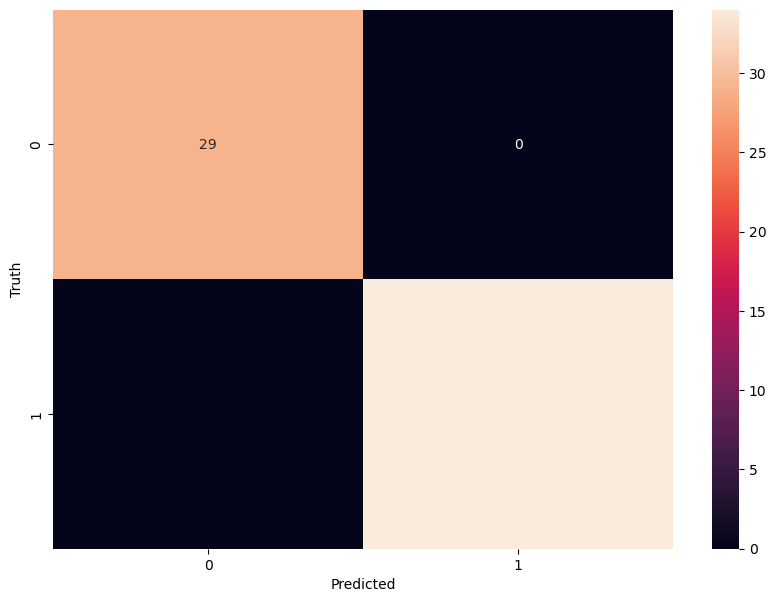

In [40]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Assuming X is your feature matrix and y are your labels
# X shape: (252, 133)
# y shape: (252,)

# Create a SVM classifier
clf = svm.SVC(kernel='linear', C=1, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(clf, feature_matrix_reshaped, label_reshaped, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()



## Random Forest:

Accuracy:  1.0


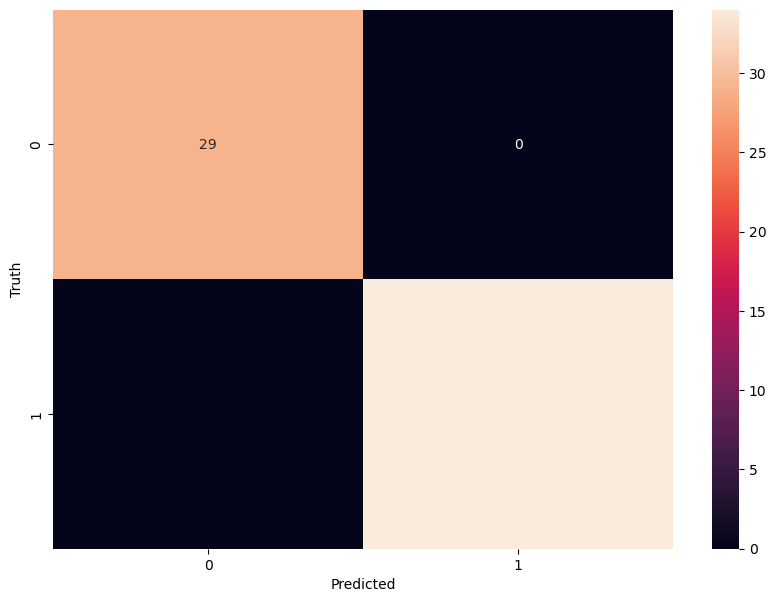

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y are your labels
# X shape: (252, 133)
# y shape: (252,)

# Split the data into training and test sets (25% of data for testing)
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_reshaped, label_reshaped, test_size=0.25, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
print("Accuracy: ", accuracy_score(y_test, y_pred))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

